# Explore here

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_banco = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', sep=';')
print(df_banco)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [4]:
# ESTADÍSTICAS DESCRIPTIVAS DE LA BASE DE DATOS:

df_banco.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# INFORMACIÓN DE LA BASE DE DATOS:

df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

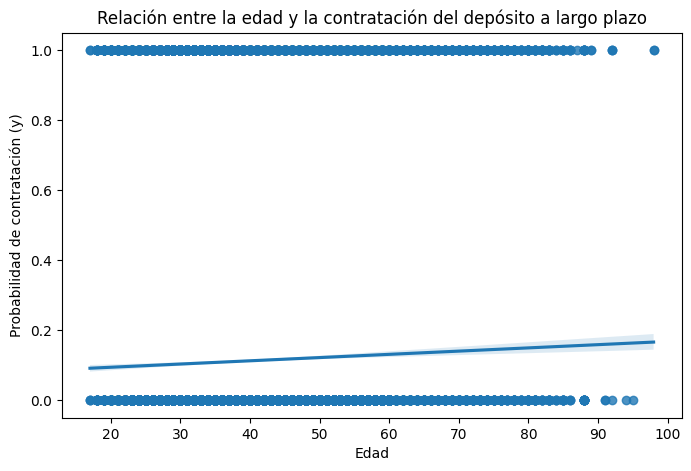

In [6]:
# NUBE DE PUNTOS Y RECTA DE REGRESIÓN:

df_banco['age'] = pd.to_numeric(df_banco['age'], errors='coerce')
df_banco['y'] = df_banco['y'].map({'no': 0, 'yes': 1})

plt.figure(figsize=(8, 5))
sns.regplot(x='age', y='y', data=df_banco)
plt.title("Relación entre la edad y la contratación del depósito a largo plazo")
plt.xlabel("Edad")
plt.ylabel("Probabilidad de contratación (y)")
plt.show()

Como se puede observar en el gráfico, la edad no es un condicionante para la contratación del fondo

In [7]:
# REVISIÓN DE VALORES NULOS:

print(df_banco.isnull().sum())


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


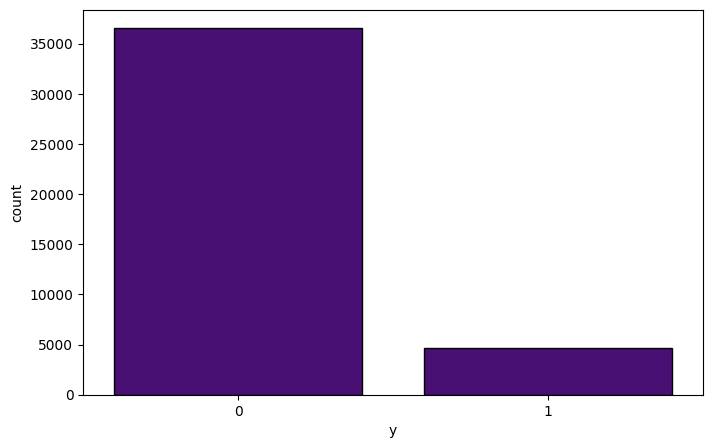

In [8]:
# DISTRIBUCIÓN DE LA VARIABLE:

plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df_banco, color='indigo', edgecolor='black')
plt.show()

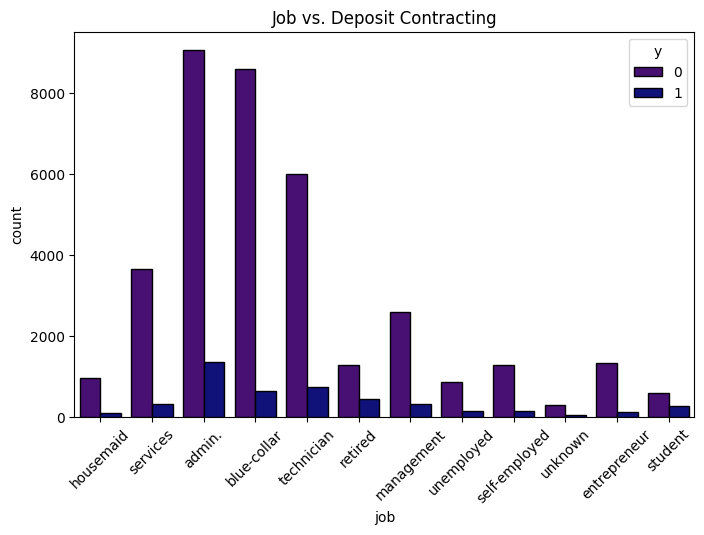

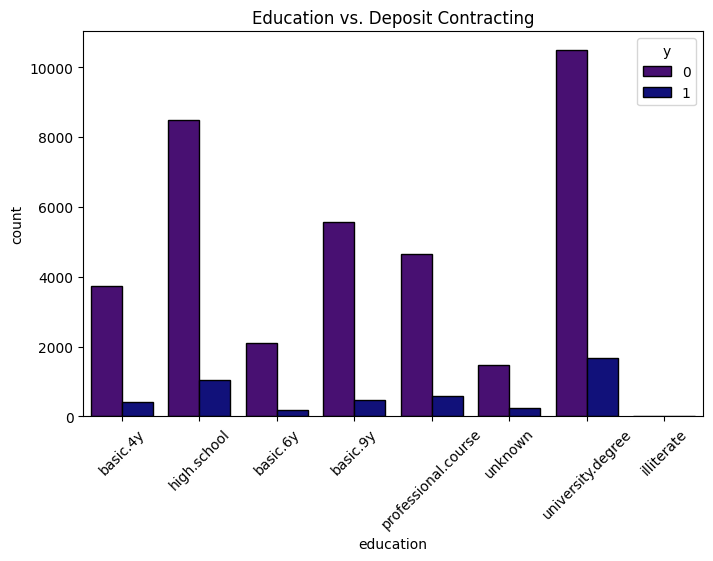

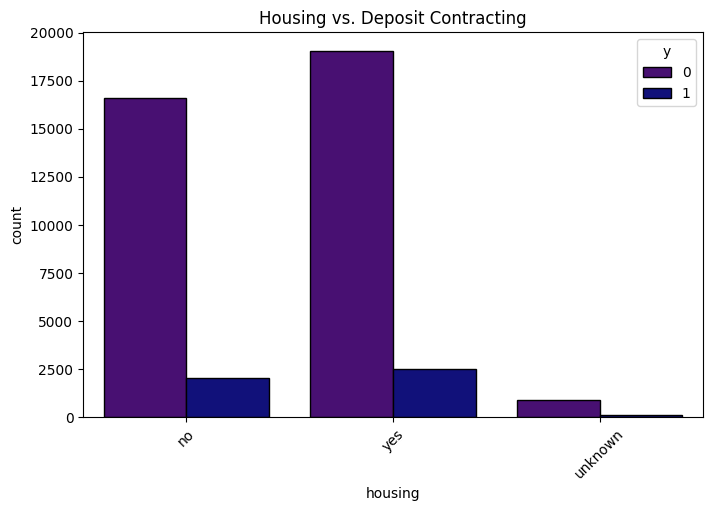

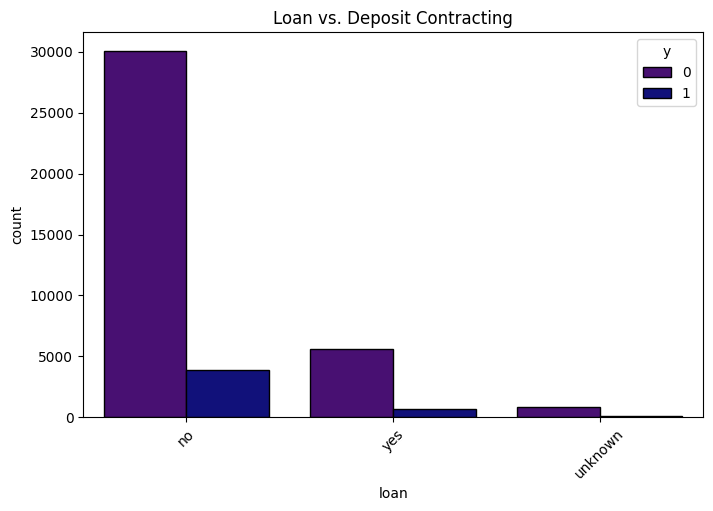

In [9]:
# DISTRIBUCIÓN DE LAS VARIABLES CATEGÓRICAS:

variables_categoricas = ['job', 'education', 'housing', 'loan']
for var in variables_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_banco, x=var, hue='y', palette=['indigo', 'darkblue'], edgecolor='black')
    plt.title(f"{var.capitalize()} vs. Deposit Contracting")
    plt.xticks(rotation=45)
    plt.show()

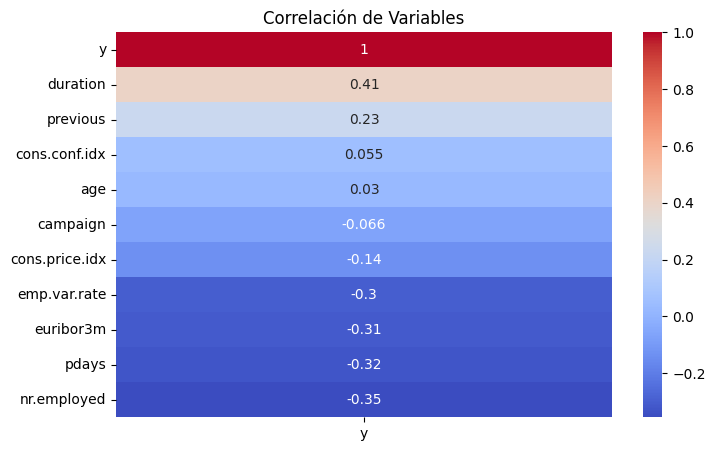

In [10]:
# CORRELACIÓN NUMÉRICA:

df_banco_corr = df_banco.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 5))
sns.heatmap(df_banco_corr[['y']].sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de Variables")
plt.show()

La variable de duración de la llamada es la que más correlación tiene con la variable y. Esto es normal teniendo en cuanto que cuanto más tiempo estén con el cliente en llamada es más probable que contrate el servicio. La segunda variable que tiene más correlación con y es previous, lo que también es normal ya que si anteriormente ya contrataron es probable que vuelvan a contratar nuevamente. Y la variable con menor correlación con y es nr.employed; esto tiene sentido ya que no normalmente no importa quien sea el empleado quien les ofrezca el servicio.

PREPROCESAMIENTO DE DATOS (EDA):

In [11]:
df_banco_encoded = pd.get_dummies(df_banco, drop_first=True)
print(df_banco_encoded)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

In [12]:
# SEPARACIÓN X e y:

X = df_banco_encoded.drop('y', axis=1)
y = df_banco_encoded['y']

In [13]:
# TRAIN TEST:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# ESTANDARIZACIÓN DE VARIABLES:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

REGRESIÓN LOGÍSTICA:

In [15]:
# ENTRENAMIENTO DEL MODELO DE REGRESIÓN:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# PEDICCIONES:

y_pred = log_reg.predict(X_test_scaled)

In [22]:
# EVALUACIÓN DEL MODELO:

print(f"Matriz de Confusión: {confusion_matrix(y_test, y_pred)}")

print(f"\nReporte de Clasificación: {classification_report(y_test, y_pred)}")

print(f"\nPrecisión: {accuracy_score(y_test, y_pred):4f}")

Matriz de Confusión: [[7111  208]
 [ 488  431]]

Reporte de Clasificación:               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7319
           1       0.67      0.47      0.55       919

    accuracy                           0.92      8238
   macro avg       0.81      0.72      0.75      8238
weighted avg       0.91      0.92      0.91      8238


Precisión: 0.915513


Aunque el modelo tiene un buen desempeño (91% de precisión) en su mayoría lo que muestra es a los clientes que no contratan el servicio ofrecido por el banco. También parece que detecta mal a los que si contratan el servicio, cosa que podría ser un fallo del banco a la hora de ofrecer sus servicios a los clientes potenciales equivocados. 

REGULARIZACIÓN LOGÍSTICA:

In [19]:
# MODELO DE REGULARIZACIÓN:

log_reg_cv = LogisticRegressionCV(
    cv=5,
    penalty='l2',
    scoring='f1',
    class_weight='balanced',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

# ENTRENAMIENTO:

log_reg_cv.fit(X_train_scaled, y_train)

# PREDICCIONES:

y_pred_cv = log_reg_cv.predict(X_test_scaled)

In [21]:
# EVALUACIÓN DEL MODELO OPTIMIZADO:

print(f"Matriz de Confusión: {confusion_matrix(y_test, y_pred_cv)}")

print(f"\nReporte de Clasificación: {classification_report(y_test, y_pred_cv)}")

print(f"\nPrecisión: {accuracy_score(y_test, y_pred_cv):4f}")

Matriz de Confusión: [[6290 1029]
 [  94  825]]

Reporte de Clasificación:               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7319
           1       0.44      0.90      0.60       919

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.93      0.86      0.88      8238


Precisión: 0.863681


La precisión ha bajado de un 91 a un 86%, mejorándo drásticamente la capacidad de detectar clientes que si contratarán el servicio bancario. Tras construir y optimizar el modelo de regresión logística para detectar qué clientes contratarían un depósito bancario a largo plazo; Con todo esto conseguimos la detección del tipo de clientes que si estarían interesados en la contratación del servicio. El recall ha subido del 47 al 90% con la optimización; convirtiéndolo en una herramienta eficaz para enfocar los esfuerzos del Departamento de Marketing hacia perfiles de clientes con mayor afinidad a la contratación de dicho servicio. 